# Causal Impact using Bayesian Structural Time-Series Models

Prof. Daniel de Abreu Pereira Uhr


## Conteúdo
 
* Causal Impact using Bayesian Structural Time-Series Models
  * Modelagem geral
  * Aplicação em Python (CausalImpact)

## Referências

Brodersen, Kay H., et al. “INFERRING CAUSAL IMPACT USING BAYESIAN STRUCTURAL TIME-SERIES MODELS.” The Annals of Applied Statistics, vol. 9, no. 1, 2015, pp. 247–74. JSTOR, http://www.jstor.org/stable/24522418. Accessed 13 Dec. 2024.

https://nbviewer.org/github/jamalsenouci/causalimpact/blob/master/GettingStarted.ipynb




**Observações:** O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer *feedback* ou sugestão de melhoria.

---

## Causal Impact using Bayesian Structural Time-Series Models


<div style="text-align:center;">
    <img src="images\capa_CausalImpact.png"  alt="Imagem" style="width: 800px;"/>
</div>

Quando tratamos com dados como mercado de ações, cliques, vendas, ou qualquer outra métrica de negócio, é comum que haja variações sazonais e/ou dependência temporal das séries de dados. Além de sua trajetória parecer mais errática. O artigo de **Brodersen et al. (2015)** propõe inferir o impacto causal com base em um **modelo de espaço de estado** de regressão que prevê a resposta contrafactual do mercado em um modelo similar à ideia de controle sintético. 

Nesse cenário, **a variável resposta é uma série temporal**, portanto o efeito causal de interesse é a **diferença entre a série real observada e a série que teria sido observada se a intervenção não tivesse ocorrido**.

Então, em contraste com os métodos tradicionais de diferenças em diferenças, os modelos de espaço de estados permitem:

* (i) inferir a evolução temporal do impacto atribuível, 
* (ii) incorporar antecedentes empíricos nos parâmetros em um tratamento totalmente bayesiano (Incorporação de Conhecimento Prévio, Atualização com Dados Observados, Modelagem de Incerteza, Evitar Overfitting/Spike-and-Slab Priors, etc - Refere-se ao uso completo do framework bayesiano, desde a definição de priors até a atualização das distribuições a posteriori com base nos dados observados.) e 
* (iii) forma flexível acomodar múltiplas fontes de variação, incluindo tendências locais, sazonalidade e a influência variável no tempo de covariáveis ​​contemporâneas. 

Uma primeira estratégia é utilizar a previsão da série estudada contra o efeito após a intervenção. A diferença entre a previsão e o valor observado é o efeito causal.

<div style="text-align:center;">
    <img src="images\CausalImpact02.png"  alt="Imagem" style="width: 800px;"/>
</div>

Outra estratégia é utilizar diferentes séries temporais que não tenham sido afetadas pelo tratamento e que possam ajudar a prever a série temporal de interesse. Ou seja, são correlacionadas com nossa série temporal  de interesse mas não devem ser afetadas pela intervenção.


<div style="text-align:center;">
    <img src="images\CausalImpact03.png"  alt="Imagem" style="width: 800px;"/>
</div>


A ideia é parecida com a estratégia de SCM no sentido de treinar o modelo no período pré-intervenção e posteriormente realizar uma previsão para o período pós-intervenção. A diferença é que o SCM é um modelo de previsão linear, enquanto o Causal Impact é um modelo de espaço de estado bayesiano.



<div style="text-align:center;">
    <img src="images\CausalImpact04.png"  alt="Imagem" style="width: 800px;"/>
</div>



O próximo gráfico apresenta a diferença entre o valor observado e o valor contrafactual. O verdadeiro efeito causal é representado pela linha verde abaixo.

<div style="text-align:center;">
    <img src="images\CausalImpact05.png"  alt="Imagem" style="width: 800px;"/>
</div>


Qualquer modelo pode ser utilizado para estimar a previsão da variável de interesse, ou seja, ele é flexivel. Abaixo temos uma representação gráfica distinguindo entre dados observados e estados latentes.

<div style="text-align:center;">
    <img src="images\CausalImpact06.png"  alt="Imagem" style="width: 800px;"/>
</div>



### Modelagem Simplificada

Para examinar o impacto causal de uma intevenção no desempenho do mercado de ações, pode-se utilizar um modelo Bayesiano de séries temporais estruturais, que é um modelo de espaço de estados para dados de séries temporais(Droste, et al, 2018; Brodersen, et al., 2015; e Scott e Varian, 2014). 

Estima-se o seguinte modelo de nível local simplificado com sazonalidade para avaliar e quantificar o impacto da intervenção no desempenho do mercado de ações:

**Equação de Observação**
$$ y_t = \mu_t + \tau_t + \epsilon_t $$

**Equação de Estado para $\mu_{t}$**
$$ \mu_{t+1} = \mu_t + w_t $$

**Equação de Estado para $\tau_{t}$**
$$ \tau_{t+1} = \sum_{s=0}^{S-2} \tau_{t-s} + v_t $$

onde $ y_t $ é o índice do mercado de ações para "i" em um momento (dia) t; $ \epsilon_t \sim N(0, \sigma^2_{\epsilon}) $, $ w_t \sim N(0, \sigma^2_{w}) $, e $ v_t \sim N(0, \sigma^2_{v}) $ são erros normais iid. Além disso, $ \mu_t $ é o nível ou a média que muda com o tempo e $ \tau_t $ é o componente sazonal, com $S$ sendo o número de estados. Em outras palavras, $ \mu_t $ e $ \tau_t $ são variáveis que não são diretamente observáveis, mas que governam a dinâmica do sistema e afetam as observações que podemos medir, elas constituem o estado latente do sistema.

Estado Latente é composto por $ \mu_t $ e $ \tau_t $. Representa variáveis que governam a dinâmica do sistema e não são diretamente observáveis. Espaço de Estados é o conjunto de todas as possíveis combinações dos valores das variáveis de estado latentes $ \mu_t $ e $ \tau_t $. Descreve completamente o estado do sistema em um dado momento.



As equações estimam a diferença após a ocorrência da intervenção entre a série temporal observada da variável resposta (por exemplo, índice do mercado de ações) e uma série temporal simulada (sintética ou prevista) que teria ocorrido sem a intervenção. 

A inferência causal posterior funciona da seguinte maneira: Primeiro, o modelo é estimado usando apenas os dados do período pré-intervenção. Em segundo lugar, usando o modelo estimado, são feitas as previsões de $ y_t $ para o período pós-intervenção. Finalmente, a diferença entre os valores previstos e os dados reais (valores observados) de $ y_t $ durante o período pós-intervenção é interpretada como o impacto causal no desempenho do mercado de ações.



**E o uso de outras série temporal como controles?**

É possível incluir um controle como um determinante do desempenho do mercado de ações. Especificamente, estimamos as seguintes equações:

**Equação de Observação**
$$ y_t = \mu_t + \tau_t + \beta X_t + \epsilon_t $$

**Equação de Estado para $\mu_{t}$**
$$ \mu_{t+1} = \mu_t + w_t $$

**Equação de Estado para $\tau_{t}$**
$$ \tau_{t+1} = \sum_{s=0}^{S-2} \tau_{t-s} + v_t $$

Note que as definições são as mesmas que as anteriores, apenas introduzimos uma variável explicativa adicional ($X$) e o parâmetro $\beta$. A adição de um controle temporal $X_t$ ao modelo afeta principalmente a equação de observação, adicionando uma nova fonte de variabilidade que melhora a adequação do modelo aos dados observados. No entanto, as equações de estado e, portanto, as variáveis de estado latentes que definem o espaço de estados, permanecem inalteradas. A inclusão de $X_t$ melhora a explicação da variabilidade em $y_t$ sem modificar diretamente o espaço de estados das variáveis latentes.


### Aplicação em Python (CausalImpact)

https://nbviewer.org/github/jamalsenouci/causalimpact/blob/master/GettingStarted.ipynb


Vamos começar a análise para identificar o impacto causal em y considerando um controle x1.

In [1]:
from causalimpact import CausalImpact
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib.pyplot as plt
import matplotlib

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 6)
np.random.seed(1)

x1 = arma_generate_sample(ar=[0.999], ma=[0.9], nsample=100) + 100
y = 1.2 * x1 + np.random.randn(100)

y[71:100] = y[71:100] + 10
data = pd.DataFrame(np.array([y, x1]).T, columns=["y","x1"])

In [3]:
data.shape
data.head()

,y,x1
0,121.308920,101.463374
1,120.563149,99.448868
2,119.832495,99.524170
3,119.433612,99.033362
4,119.840664,100.779647


<Axes: >

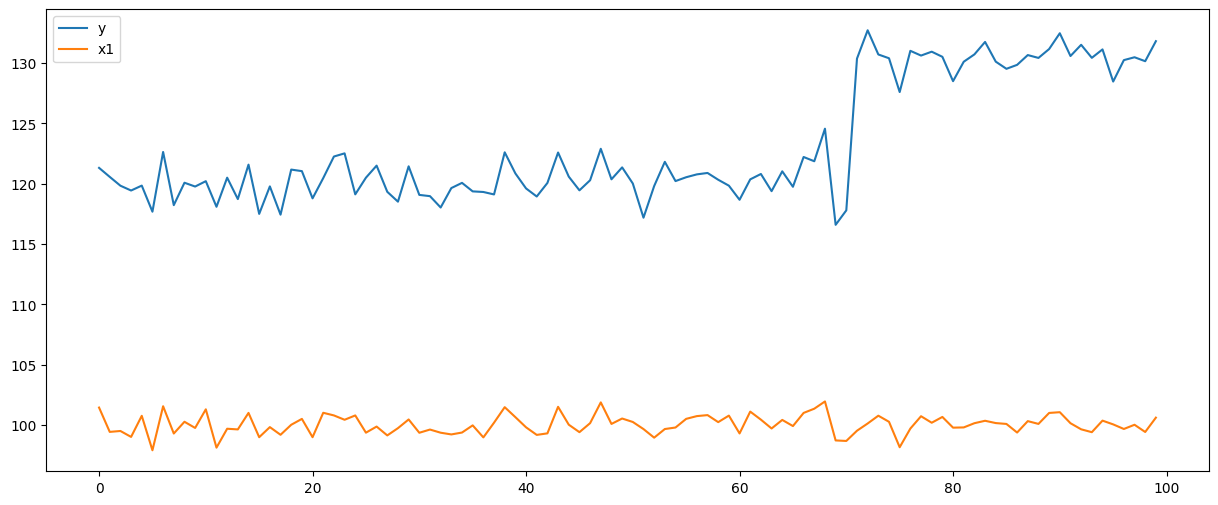

In [4]:
data.plot()

In [5]:
pre_period = [0,69]
post_period = [71,99]

In [6]:
date_range = pd.date_range(start="2014-01-01", periods=100)
ts_data = data.copy()
ts_data.index = date_range
ts_data.head()

,y,x1
2014-01-01,121.308920,101.463374
2014-01-02,120.563149,99.448868
2014-01-03,119.832495,99.524170
2014-01-04,119.433612,99.033362
2014-01-05,119.840664,100.779647


In [7]:
ts_pre_period = [pd.to_datetime(date) for date in ["2014-01-01", "2014-03-12"]]
ts_post_period = [pd.to_datetime(date) for date in ["2014-03-13", "2014-04-10"]]

In [8]:
ts_impact = CausalImpact(ts_data, ts_pre_period, ts_post_period)

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(


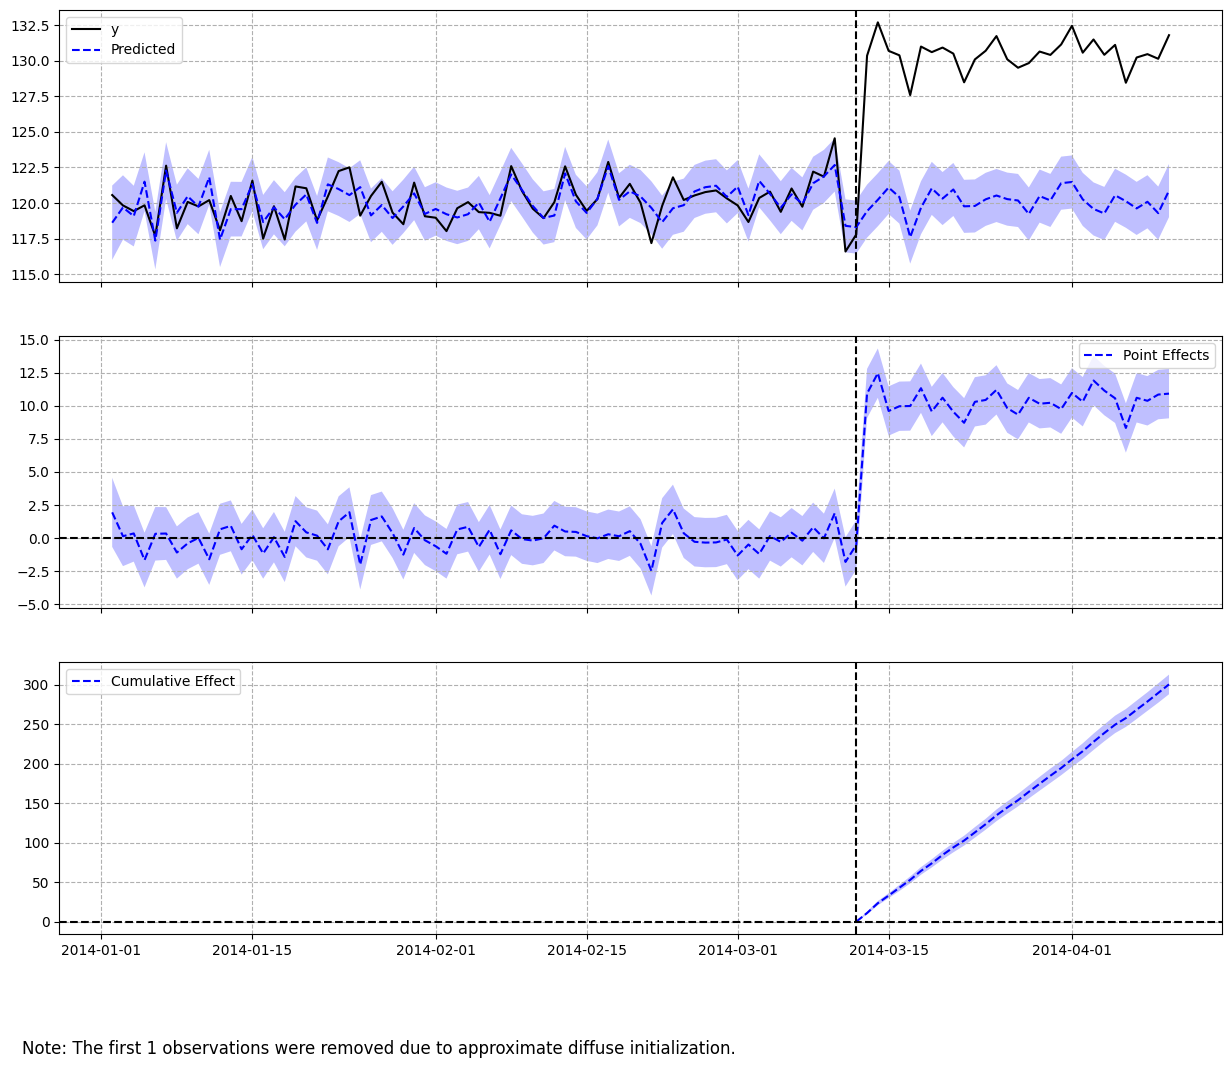

In [9]:
ts_impact.plot()

In [10]:
print(ts_impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    130.5              3784.61
Prediction (s.d.)         120.14 (0.22)      3484.01 (6.36)
95% CI                    [119.71, 120.57]   [3471.66, 3496.59]

Absolute effect (s.d.)    10.37 (0.22)       300.6 (6.36)
95% CI                    [9.93, 10.79]      [288.03, 312.95]

Relative effect (s.d.)    8.63% (0.18%)      8.63% (0.18%)
95% CI                    [8.27%, 8.98%]     [8.27%, 8.98%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [11]:
print(ts_impact.summary(output="report"))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 130.5. By contrast, in the absence of an
intervention, we would have expected an average response of 120.14.
The 95% interval of this counterfactual prediction is [119.71, 120.57].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 10.37 with a 95% interval of
[9.93, 10.79]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3784.61.
By contrast, had the intervention not taken place, we would have expected
a sum of 3484.01. The 95% interval of this prediction is [3471.66, 3496.59].


The above results are given in terms of absolute numbers. In relative
terms, the response 

**Análise sem controle x1**

Agora vamos fazer a análise apenas para a variável y, sem a inclusão de controle (x1).

In [12]:
# Criando o DataFrame com apenas a variável y
data2 = pd.DataFrame(y, columns=["y"])

# Definindo os períodos pré e pós-intervenção
pre_period = [0, 69]
post_period = [71, 99]

# Definindo o índice de data
date_range = pd.date_range(start="2014-01-01", periods=100)
ts_data2 = data2.copy()
ts_data2.index = date_range

# Definindo os períodos com datas
ts_pre_period = [pd.to_datetime(date) for date in ["2014-01-01", "2014-03-12"]]
ts_post_period = [pd.to_datetime(date) for date in ["2014-03-13", "2014-04-10"]]

<Axes: >

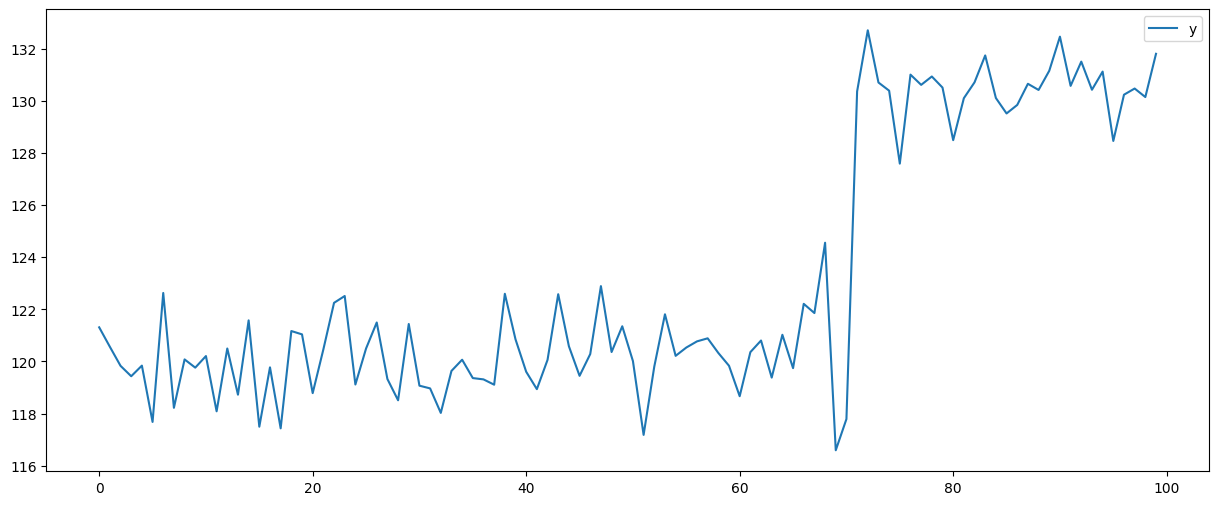

In [13]:
data2.plot()

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(


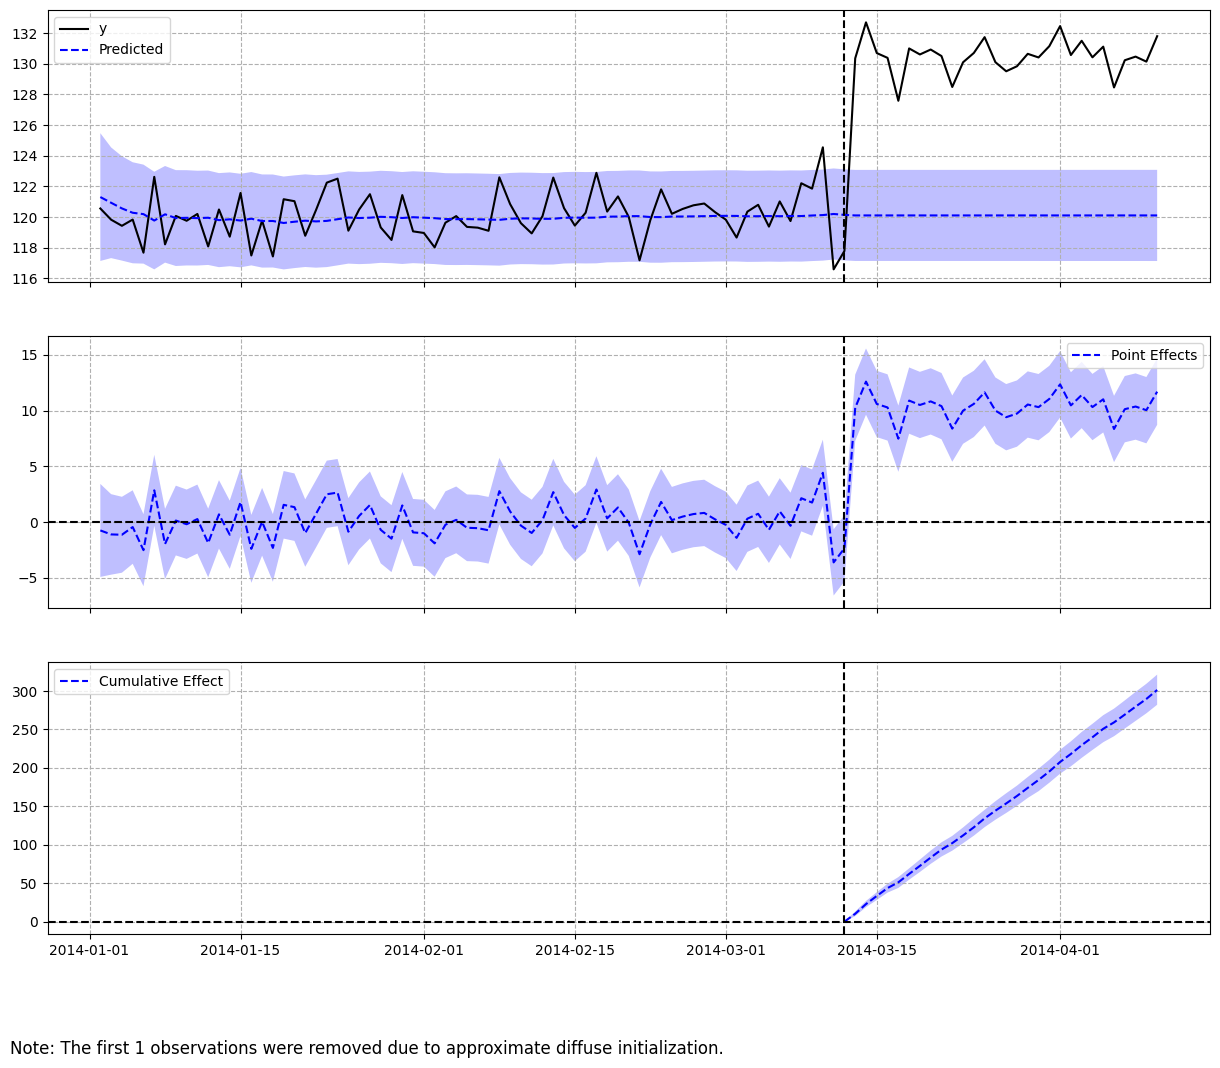

In [14]:
# Rodando o modelo de impacto causal sem a covariável x1
ts_impact2 = CausalImpact(ts_data2, ts_pre_period, ts_post_period)
ts_impact2.plot()

In [15]:
print(ts_impact2.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    130.5              3784.61
Prediction (s.d.)         120.11 (0.35)      3483.21 (10.01)
95% CI                    [119.42, 120.77]   [3463.23, 3502.46]

Absolute effect (s.d.)    10.39 (0.35)       301.41 (10.01)
95% CI                    [9.73, 11.08]      [282.15, 321.38]

Relative effect (s.d.)    8.65% (0.29%)      8.65% (0.29%)
95% CI                    [8.1%, 9.23%]      [8.1%, 9.23%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [16]:
print(ts_impact2.summary(output="report"))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 130.5. By contrast, in the absence of an
intervention, we would have expected an average response of 120.11.
The 95% interval of this counterfactual prediction is [119.42, 120.77].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 10.39 with a 95% interval of
[9.73, 11.08]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3784.61.
By contrast, had the intervention not taken place, we would have expected
a sum of 3483.21. The 95% interval of this prediction is [3463.23, 3502.46].


The above results are given in terms of absolute numbers. In relative
terms, the response 